In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import df_to_list

import pandas as pd
from utils.cargar import df_caso
from utils.preprocesamiento import process_df, procesar_adela

op_left, op_right = 'Priorizar criterios técnicos', 'Priorizar plazos'

caso = 'adela'
df = df_caso(caso)
df = procesar_adela(df)
df = df[df['opt_left'] == 'Producir el alimento contra déficit vitamínico']

df = process_df(df,'comment','sel',verbose=False)

train_indices = pd.read_csv('../utils/splits/train_indices_{}'.format(caso), header=None)[0].tolist()
test_indices = pd.read_csv('../utils/splits/test_indices_{}'.format(caso), header=None)[0].tolist()
print("Partición train-test cargada")

df_train = df.iloc[train_indices]
df_test = df.iloc[test_indices]

Partición train-test cargada


In [2]:
from bertopic import BERTopic

model = BERTopic.load("modelos/BT-{}.bertopic".format(caso))

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-pac

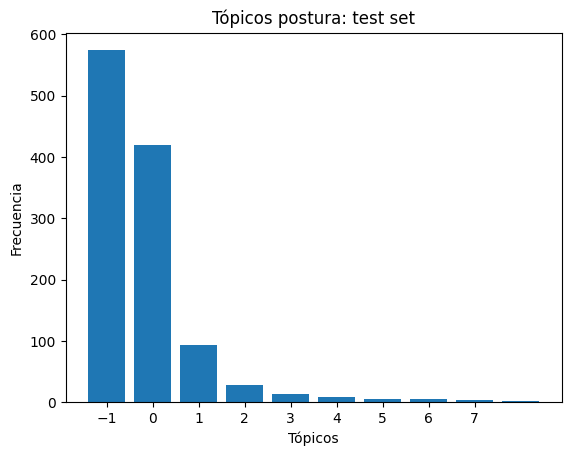

In [3]:
from TM_utils import plot_frecuencies, get_top_k_topics, get_table_top_topics
from utils.exploracion import print_table_md
from utils.preprocesamiento import StemmerTokenizer

tokenizador = StemmerTokenizer(stem=False,rmv_punctuation=True)

output_test = model.transform(df_to_list(df_test,'comment',tokenizador))

plot_frecuencies(output_test[0],label='test set')

In [4]:
top_5_keys, top_5_values = get_top_k_topics(output_test[0],k=11)

print("Tópicos relevantes en test set")

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=3)
print_table_md(headers, data)

Tópicos relevantes en test set


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 |
| --- | --- | --- | --- | --- |
| -1 | 0.49740034662045063 | tradiciones | pueblo | alimento |
| 0 | 0.36395147313691506 | alimento | tradiciones | pueblo |
| 1 | 0.0805892547660312 | tradiciones | pueblo | acuerdo |
| 2 | 0.024263431542461005 | salud | importante | personas |
| 3 | 0.012131715771230503 | proyecto | innovación | si |
| 4 | 0.00779896013864818 | chile | relleno | chilena |
| 6 | 0.004332755632582322 | opinión | opinion | mi |
| 5 | 0.004332755632582322 | postura | mantengo | no |
| 7 | 0.0034662045060658577 | ciencia | desarrollo | humano |
| 8 | 0.0017331022530329288 | adele | debería | originario |


In [5]:
from TM_utils import get_k_random_samples_from_topic

top = 0
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  0
Certainty: 0.8346477258966415 Text: Es importante respetar y resguardar las tradiciones de los pueblos originarios ya que son gran parte de la cultura e identidad del lugar y se podría simplemente tratar el déficit de vitaminas con diferentes alimentos
Certainty: 0.8197753165828006 Text: Los indígenas al mostrar su descontento con el uso de su olanta ancestral, Adela debería de cesar la producción del alimento ya que estaría pasando a llevar una cultura
Certainty: 0.6228109824763064 Text: Si Adela mecaniza un sistema en el que estén de acuerdo el pueblo originario del caso, saldría beneficiada ella misma, ya que el pueblo originario la dejaría utilizar el alimento para lo que necesitaría, beneficiando así a las personas involucradas.
Certainty: 0.32767536455110247 Text: Mi justificación anterior se mantiene, y sigo sosteniendo que es un caso complicado pero creo que aquí podríamos llegar a un termino medio. Podríamos tomar una semilla y cultivarla aparte, así respe

In [6]:
model.get_representative_docs(0)

['Si bien importante respetar tradiciones identitarias pueblo originario población beneficiada impacto alimento gran importancia salud niños adultos mayores presentan déficit vitaminico debería priorizar producción mismo',
 'Me parece importante resguardar tradiciones identitarias creo Adela puede conversar intentar llegar acuerdo pueblo originario así poder producir alimento pasar llevar pueblo',
 'Adela debería producir alimento Creo importante beneficiar gente posee déficit vitamínico importante resguardar tradiciones identitarias Pero salud población']

In [7]:
top = 1
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  1
Certainty: 0.9999999986908423 Text: Con la ayuda de la conversación que tuve con mis compañeros, mi postura cambio y ya no es tan extrema, además de que logre considerar que si se llega un acuerdo en donde el pueblo originario no sienta sus tradiciones pasadas a llevar este se podría llevar a cabo
Certainty: 0.5682892597594645 Text: Debería haber un límite entre los dos
Certainty: 0.5473424251300295 Text: debido a que se puede integrar a gente de la comunidad indígena, se pueden buscar soluciones para que no se pierda su identidad en el proceso
Certainty: 0.7275347298847986 Text: Es muy importante llegar a un acuerdo con los pueblos indígenas al ser algo sagrado para ellos y llevar a cabo el proyecto de igual manera no sería adecuado ya que pasa a llevar sus creencias. Siempre al hacer un proyecto lo mejor es provocar el menor daño posible en el entorno y en las personas y es lo que se debe priorizar
Certainty: 0.08745588204904796 Text: La verdad puede llegar a un 

In [8]:
model.get_representative_docs(1)

['Se deben resguardar tradiciones identitarias puesto deben proteger cuidar tradiciones pueblo d producción Por lado si debe producir alimento debería negociar pueblo originario buscar solución afecte priorizando costumbres cuidado tradiciones',
 'Primero intentar llegar acuerdo pueblo si puede si puede salvar personas fruto entonces importante vida personas tradición',
 'Creo importante resguardar tradiciones pueblo originario cultivó fruto primero importante respetar dicen escuchar inquietudes Creo importante dar espacio dialogo llegar acuerdo si pueblo originario acuerdo debe modificar nuevo producto simplemente producirlo fruto buscar manera involucre pueblo originario']

In [9]:
top = 2
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  2
Certainty: 0.5755543890987261 Text: Si bien creo que es muy importante respetar las costumbres y creencias de todos, en especial cuando se trata de algo que es sagrado para ellos, creo que traería muchos mas beneficios la producción del alimento, de todas formas si lo están produciendo en donde vive este pueblo originario se debería tratar de hablarlo bien con ellos y no extraerlo de mala forma.
Certainty: 0.9999999990371884 Text: Somos partidarios de priorizar la salud pública por sobre ciertas tradiciones, como grupo pensamos que el impacto a cierta cultura valdría la pena si es que consideramos todo el bien que se puede causar en la salud a nivel país.
Certainty: 0.863633866072977 Text: poniendo la salud y las traciciones en una balanza consideramos que la salud es aun más importante, ya que sin ella, no habrian tradiciones que precervar.
Certainty: 0.9178311655608475 Text: Buscar un equilibrio resguardando la cultura priorizando un poco más la salud de la socie

In [10]:
model.get_representative_docs(2)

['Considero mas importante priorizar mayor parte población bien salud',
 'importante salud creencias tradiciones pueblo originario',
 'Si bien respetar tradiciones personas mayor prioridad salud personas']

In [11]:
top = 3
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  3
Certainty: 0.009370964993788297 Text: En este caso, se comentó que dentro del proceso ingenieril resulta fundamental encontrar nuevos caminos de innovación si es que involucra consecuencias irreversibles no solamente en la cultura sino también en la identidad de un pueblo. En esta sección estuve de acuerdo con la opción 2, ya que es fundamental; pese a que se hayan dedo todas las posibilidades de realizar un proyecto ingenieril (como el de Adela), buscar otras formas de lograr beneficiar a la salud pública.
Certainty: 0.008672768695639068 Text: La forma en que está diseñada la innovación nos parece bastante nociva, y que de todas maneras es modificable, de modo de producir el producto de manera respetuosa con las comunidades y los ecosistemas. Es una buena herramienta y por tanto se debería proseguir pero adaptando la forma
Certainty: 0.06324169335188412 Text: Es necesario lograr el equilibrio entre el proyecto y a quienes involucran de por medio, se debe tener en 

In [12]:
model.get_representative_docs(3)

['si bien adela limitaciones legales proyecto innovación si deberia tomar cuenta opinión pueblos originarios zona tratar llegar acuerdo fin respetar tradiciones cultura',
 'si bien adela limitaciones legales proyecto innovación si deberia tomar cuenta opinión pueblos originarios zona tratar llegar acuerdo fin respetar tradiciones cultura',
 'si bien adela limitaciones legales proyecto innovación si deberia tomar cuenta opinión pueblos originarios zona tratar llegar acuerdo fin respetar tradiciones cultura']

In [13]:
top = 4
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

Samples for topic  4
Certainty: 0.17588311898437514 Text: En Chile se ha pisoteado demasiado a los pueblos originarios (ej el pueblo Ona), le debemos históricamente respeto a ellos y a sus tradiciones y creencias.
Certainty: 0.06465346621518785 Text: El cultivar el alimento en contra de las tradiciones del pueblo originario sería una gran falta de respeto por parte de los integrantes del proyecto, ya que se estaría eliminando la cultura e identidad del pueblo y provocando aún más separación entre ellos y el resto de Chile, lo que fue y sigue siendo un detonante para los conflictos que tienen los pueblos con el estado.
Certainty: 0.04911126316623055 Text: Basándonos en la información proporcionada, una parte significativa de la población chilena se beneficiaría de esta iniciativa. Además, dado que las personas pertenecientes al pueblo originario también forman parte de la población chilena, podrían beneficiarse de manera similar. Es importante destacar que ningún grupo o entidad debería

In [14]:
model.get_representative_docs(4)

['Mi opinión cambió Ojalá posible pueda llegar acuerdo pueblos originarios respetar aunque parte Pero definitivamente producir alimento genera bien mayor puede ayudar 50 % niños adultos mayores Chile',
 'En caso pueblo diaguita opone directamente producción alimento creo ser alimento propio pueblo cultura importante escucharlos intentar llegar alguna clase acuerdo caso ser posible cuenta palabra pueblo originario importante país Además escucharlos podría producir algún tipo conflicto pueblo diaguita culturalmente beneficia Chile afecta estabilidad seguridad política país pudiendo incluso desencadenar alguna situación extrema además Chile pueblos originarios tomados cuenta deberían opinión',
 'Ojalá posible pueda llegar acuerdo pueblos originarios respetar aunque parte Pero definitivamente producir alimento genera bien mayor puede ayudar 50 % niños adultos mayores Chile']

In [25]:
top = 5
df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,top)

print("Samples for topic ", top)
for i in range(len(df_samples)):
    print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])

print('\n')
model.get_representative_docs(5)

Samples for topic  5
Certainty: 0.9999999999285294 Text: no se responde porque se repitió
Certainty: 0.9999999999285294 Text: Esos fueron los promedios
Certainty: 0.6190307327842242 Text: Idem al anterior
Certainty: 0.9999999999285294 Text: yo creo q esta
Certainty: 0.10416092047221197 Text: Por lo mismo que dije antes




['Mantengo postura creo entiendi uso puntaje',
 'Mantengo postura postura',
 'Mantengo postura']

Visualización

In [15]:
test_docs = df_to_list(df_test,'comment',tokenizador)

In [16]:
model.probabilities_[0]

array([0.70997229, 0.16899382, 0.05279868, 0.02142947, 0.01830873,
       0.00970233, 0.00687404, 0.00395387, 0.00796679])

In [17]:
model.visualize_distribution(model.probabilities_[0])

In [18]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = sentence_model.encode(test_docs, show_progress_bar=True)

Batches:   0%|          | 0/37 [00:00<?, ?it/s]

In [19]:
embeddings.shape

(1154, 384)

In [20]:
len(test_docs)

1154

In [21]:
from umap import UMAP
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

In [22]:
model.visualize_documents(test_docs, embeddings=reduced_embeddings)

IndexError: list index out of range

In [26]:
model.visualize_heatmap()

In [27]:
from sentence_transformers import SentenceTransformer

# Prepare embeddings
sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = sentence_model.encode(test_docs, show_progress_bar=False)

# Train BERTopic and extract hierarchical topics
hierarchical_topics = model.hierarchical_topics(test_docs)

# Run the visualization with the original embeddings
model.visualize_hierarchical_documents(test_docs, hierarchical_topics, embeddings=embeddings)

ValueError: All arrays must be of the same length

In [28]:
model.visualize_term_rank()

In [29]:
model.visualize_topics()

In [30]:
target_words = ['alimento','tradiciones','pueblo','acuerdo','salud','importante','personas','proyecto','chile','postura','mantengo','ciencia','desarrollo']

In [31]:
from collections import Counter
import re

# Combine all documents into a single string
all_text = ' '.join(test_docs)

# Preprocess the text (convert to lowercase and remove punctuation)
cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Tokenize the cleaned text
tokens = cleaned_text.split()

# Count word frequencies
word_frequencies = Counter(tokens)

word_frequency_list = [(word, word_frequencies[word]) for word in target_words]
word_frequency_list

[('alimento', 527),
 ('tradiciones', 692),
 ('pueblo', 548),
 ('acuerdo', 250),
 ('salud', 275),
 ('importante', 348),
 ('personas', 316),
 ('proyecto', 139),
 ('chile', 5),
 ('postura', 38),
 ('mantengo', 20),
 ('ciencia', 3),
 ('desarrollo', 17)]

In [32]:
similar_topics, similarity = model.find_topics('integridad', top_n=0)
similar_topics

[5, 1, 3, 6, 2, 7, -1, 4, 0, 8]

In [33]:
similarity

[0.5515804090192521,
 0.3145556935647881,
 0.30870191438230266,
 0.28784286509073453,
 0.24968738888005088,
 0.23215631042972182,
 0.22768237466867247,
 0.19289693100119032,
 0.1674644755984093,
 0.16477955508733302]

In [34]:
def find_index_of_integer(lst, target):
    try:
        index = lst.index(target)
        return index
    except ValueError:
        return -1  # Return -1 if the target integer is not found in the list

In [35]:
target_topics = [0, 1, 2, 3, 4, 5]
[similarity[find_index_of_integer(similar_topics,i)] for i in target_topics]

[0.1674644755984093,
 0.3145556935647881,
 0.24968738888005088,
 0.30870191438230266,
 0.19289693100119032,
 0.5515804090192521]

In [36]:
def get_topics_share_concept(model,concept):
    similar_topics, similarity = model.find_topics(concept, top_n=0)
    return [similarity[find_index_of_integer(similar_topics,i)] for i in target_topics]

In [37]:
def get_second_item_by_first(list_of_tuples, target_first):
    for first, second in list_of_tuples:
        if first == target_first:
            return second
    return None  # Return None if the target value is not found

In [38]:
import numpy as np

vec_salud = np.array(get_topics_share_concept(model,'salud'))
vec_salud*get_second_item_by_first(word_frequency_list,'salud')

array([ 84.19833581,  56.47465839, 149.23752758,  41.07510724,
        61.39739655, 148.30279911])

In [39]:
vectors = []

for word in target_words:
    vec = np.array(get_topics_share_concept(model,word))
    vectors.append(vec*get_second_item_by_first(word_frequency_list,word))

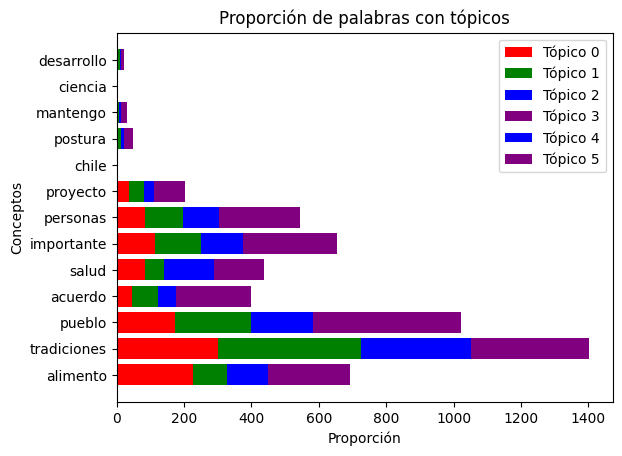

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Convert vectors to a NumPy array for easy manipulation
vector_array = np.array(vectors)

# Get the number of vectors and number of dimensions
num_vectors, num_dimensions = vector_array.shape

# Create a horizontal bar plot with stacked bars
plt.barh(range(num_vectors), vector_array[:, 0], color='red', label='Tópico 0')
plt.barh(range(num_vectors), vector_array[:, 1], left=vector_array[:, 0], color='green', label='Tópico 1')
plt.barh(range(num_vectors), vector_array[:, 2], left=vector_array[:, 0] + vector_array[:, 1], color='blue', label='Tópico 2')
plt.barh(range(num_vectors), vector_array[:, 3], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2], color='purple', label='Tópico 3')
plt.barh(range(num_vectors), vector_array[:, 4], left=vector_array[:, 0] + vector_array[:, 1], color='blue', label='Tópico 4')
plt.barh(range(num_vectors), vector_array[:, 5], left=vector_array[:, 0] + vector_array[:, 1] + vector_array[:, 2], color='purple', label='Tópico 5')

# Set labels, title, and legend 
plt.xlabel('Proporción')
plt.ylabel('Conceptos')
plt.title('Proporción de palabras con tópicos')
# plt.yticks(range(num_vectors), range(1, num_vectors + 1))
plt.yticks(ticks = range(num_vectors) ,labels = target_words, rotation = 'horizontal')
plt.legend()
# Show the plot
plt.show()